<span style="color:orange;font-size:30px">**Simple machine learning in Python**</span><br>
<span style="color:orange;font-size:15px">**Friday 16.06**</span>

<p>&emsp; In the Python machine learning ecosystem there are many libraries available for specific tasks that depend on what techniques are necessary for a project. </p>
<p>&emsp; Still, there are 3 key-libraries essential for most tasks:</p>
<br>
<ul>
    <li> <span style="color:pink;font-size:15px"> <b>NumPy:</b> &emsp;&emsp;&ensp; For numerical computing and efficient data processing. Many other libraries rely on NumPy for manipulating large datasets.</span> </li><br>
    <span style="color:pink;font-size:15px"><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
    -- To avoid it I'll use simple DataSets, but with large data it is VERY important --</b></span><br><br>
    <li> <span style="color:lightgreen;font-size:15px"><b>Pandas:</b> &emsp;&emsp;&ensp; For data preprocessing and exploratory data analysis (EDA) tasks in machine learning. </span> </li><br>
    <li> <span style="color:lightgreen;font-size:15px"><b>Scikit-learn:</b> &ensp; Offers a wide range of <b>SUPERVISED</b> and <b>UNSUPERVISED</b> learning algorithms, while allowing to incorporate Pandas and NumPy into a pipeline. </span></li>
</ul>
<br>

![HAHA](IMG/SoooMany.png)

<p>&emsp; My objective for today is to make machine learning less scary and enable anyone to create simple models using straightforward code. Therefore, I will only use Pandas for pre-processing and Scikit-learn for modeling.</p>
<p>&emsp; Additionally, I'll only focus on Supervised ML, where the goal is to learn a relationships between the input features and respective target variable. This is the more common approach, is less subjective and has a clear guided path.
</p>

![title](IMG/Workflow.png)

In [166]:
### Just use "!" before any terminal command directly in a python cell

!pip install scikit-learn pandas

<br><p>&emsp; SML is essencially divided into 2 problem types: Classification and Regression... </p>

<br><span style="color:Red;font-size:30px">**- Classification**</span><br>

<p>&emsp; Learn a model that can accurately separate unseen instances into one of known classes.</p>

<p>&emsp;&emsp;&emsp;(p.e.) Separate Multiple Flies into their most likely originated population.</p>

<br><span style="color:#03989E;font-size:25px">**0. Retrieve Data**</span><br>

        Cool simple Data about PENGUINS!!

<p>&emsp; Target: Estimate the <b>-specie-</b> of penguin (Adelie or Chinstrap), with: </p>
<ul>
    <li> Physical Attribute &ensp; Bick Length, Bick Deepth, Flipper Length, Body Mass </li>
    <li> Gender &emsp;&emsp;&emsp;&emsp;&emsp; Sex</li>
    <li> Location &emsp;&emsp;&emsp;&emsp;&ensp; island</li>
</ul>

In [164]:
import pandas as pd

In [87]:
penguin = pd.read_csv('./HappyFeet/penguins.csv', sep=',', index_col='id')
penguin

,species,island,bick_len,bick_dep,flipper_len,BM,sex
id,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


<br><span style="color:#1D5C5E;font-size:25px">**1. Clean and Explore**</span><br>

In [88]:
describe = penguin.describe()
describe

,bick_len,bick_dep,flipper_len,BM
count,221.000000,221.000000,221.000000,221.000000
mean,41.449774,26.427602,191.932127,3719.230769
std,8.547757,119.892109,7.612186,452.478122
min,-55.900000,15.500000,172.000000,2700.000000
25%,37.700000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,45.900000,19.100000,196.000000,4000.000000
max,58.000000,1800.600000,228.000000,5600.000000


![Waterfall](IMG/Reality.png)

<span style="color:lightblue;font-size:20px">**> Missing Values**</span><br>

In [49]:
describe.style.applymap(lambda x: "background-color:darkred" if x==221 else "background-color:darkgreen")

,bick_len,bick_dep,flipper_len,BM
count,221.000000,221.000000,221.000000,221.000000
mean,41.449774,26.427602,191.932127,3719.230769
std,8.547757,119.892109,7.612186,452.478122
min,-55.900000,15.500000,172.000000,2700.000000
25%,37.700000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,45.900000,19.100000,196.000000,4000.000000
max,58.000000,1800.600000,228.000000,5600.000000


In [89]:
penguin.isna().sum()

species        0
island         0
bick_len       1
bick_dep       1
flipper_len    1
BM             1
sex            6
dtype: int64

In [90]:
penguin = penguin.dropna()

<span style="color:lightblue;font-size:20px">**> Incorrect Values**</span><br>

<p>&emsp; The focus of data cleaning is to improve data quality, but different approaches to data cleaning handle outliers in different ways...</p> 
<p>&emsp; Remember that outliers are not automatically considered "nonsense values", they can represent valid and meaningful observations.</p><br>

In [52]:
describe.style.applymap(lambda x: "background-color:purple" if x in [-55.9, 1800.6] else "background-color:darkgreen")

,bick_len,bick_dep,flipper_len,BM
count,221.000000,221.000000,221.000000,221.000000
mean,41.449774,26.427602,191.932127,3719.230769
std,8.547757,119.892109,7.612186,452.478122
min,-55.900000,15.500000,172.000000,2700.000000
25%,37.700000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,45.900000,19.100000,196.000000,4000.000000
max,58.000000,1800.600000,228.000000,5600.000000


In [91]:
# Remove extreme values
penguin = penguin[penguin['bick_len'] >= 0]
penguin = penguin[penguin['bick_dep'] <= 100]

penguin

,species,island,bick_len,bick_dep,flipper_len,BM,sex
id,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


<span style="color:lightblue;font-size:20px">**> Exploration**</span><br>

In [266]:
### Just use "!" before any terminal command directly in a python cell

!pip install seaborn matplotlib

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

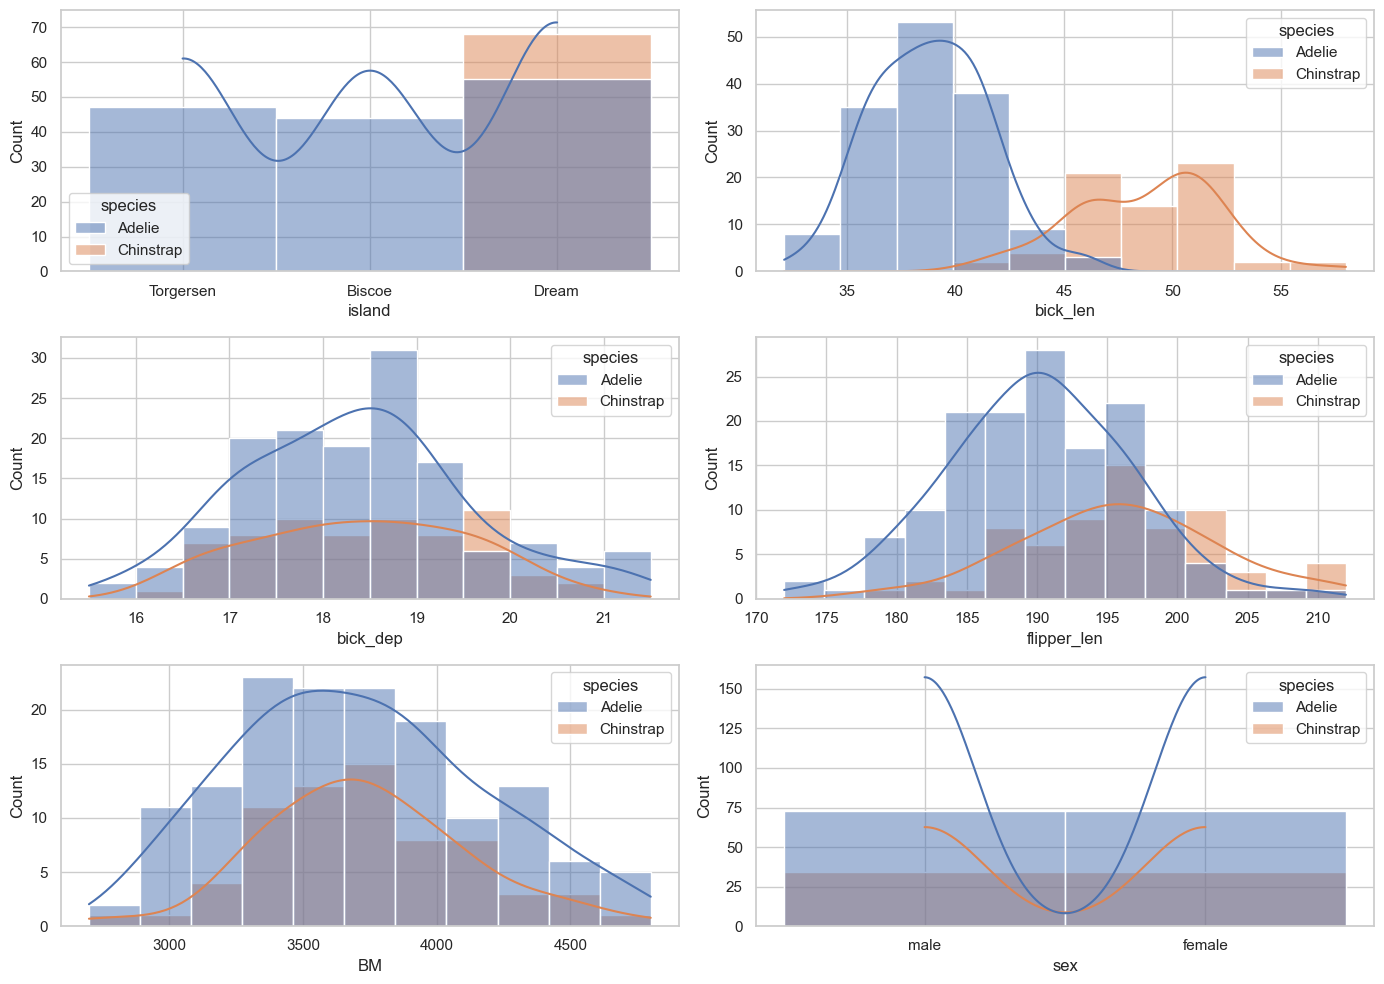

In [93]:
df = penguin
hue = 'species'
title = 'Train'

cols   = df.columns.drop([hue])
n_cols = 2
n_rows = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 10))

for i, var_name in enumerate(cols):
    row = i // n_cols
    col = i % n_cols
    ax  = axes[row, col]
    sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue)
    
plt.tight_layout()
plt.show()

<br><span style="color:#1D5C5E;font-size:25px">**1. Prepare/Transform**</span><br>

<span style="color:lightblue;font-size:20px">**> Numeric**</span><br>

<p>&emsp; In many machine learning algorithms, the magnitude of the features can impact the model's performance. Normalizing the data ensures that these algorithms work optimally and provide accurate results. Additionally, different scales dificult comparison of features. </p>

<p>&emsp; It is good practice to alway Min-Max-Normalize or Standardize numeric features in ML.</p>

        JUST DON'T DO IT IN THE TARGET VARIABLE IF IT IS CONTINUOUS

In [95]:
penguin     = penguin.reset_index(drop=True)
int_dataset = penguin.select_dtypes(include='number')
str_dataset = penguin.select_dtypes(include='object')

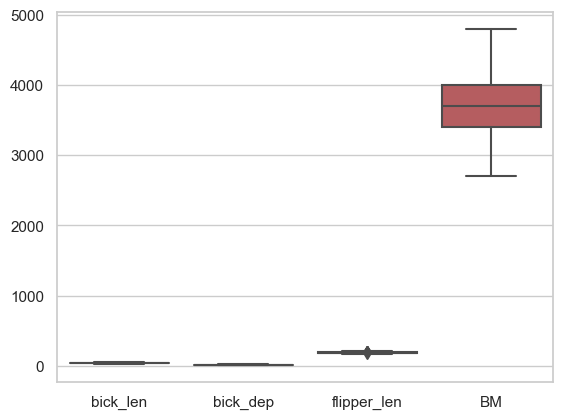

,bick_len,bick_dep,flipper_len,BM
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
209,43.5,18.1,202.0,3400.0
210,49.6,18.2,193.0,3775.0
211,50.8,19.0,210.0,4100.0
212,50.2,18.7,198.0,3775.0


In [96]:
sns.boxplot(penguin)
plt.show()
int_dataset

In [97]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(int_dataset)

# Transform your data using the scaler
X_scaled = scaler.transform(int_dataset)
int_scal = pd.DataFrame(X_scaled, columns=int_dataset.columns)

<Axes: >

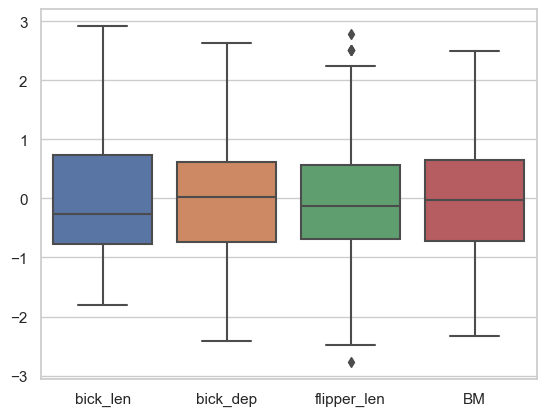

In [98]:
sns.boxplot(int_scal)

<span style="color:lightblue;font-size:20px">**> Objects**</span><br>

<p>&emsp; Most machine learning models cannot directly analyze columns with string values (categorical variables) as they typically require numerical inputs. </p>
<p>&emsp; However, you can preprocess categorical variables to convert them into a suitable format for machine learning models. </p>

In [99]:
print(
    str_dataset['species'].unique(),
    str_dataset['island'].unique(),
    str_dataset['sex'].unique()
    )

str_dataset

['Adelie' 'Chinstrap'] ['Torgersen' 'Biscoe' 'Dream'] ['male' 'female']


,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,female
4,Adelie,Torgersen,male
...,...,...,...
209,Chinstrap,Dream,female
210,Chinstrap,Dream,male
211,Chinstrap,Dream,male
212,Chinstrap,Dream,female


In [100]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(str_dataset['sex'])

str_dataset['sex'] = label_encoded
str_dataset

# Label encoding
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(str_dataset['species'])

str_dataset['species'] = label_encoded
str_dataset

,species,island,sex
0,0,Torgersen,1
1,0,Torgersen,0
2,0,Torgersen,0
3,0,Torgersen,0
4,0,Torgersen,1
...,...,...,...
209,1,Dream,0
210,1,Dream,1
211,1,Dream,1
212,1,Dream,0


<p>&emsp; Simply assigning numerical values to these categories could introduce unintended relationship where there is no ranking between categories.</p>

        Good: Small, Medium, Large
        Baad: Opera, Cinema, Football

In [101]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(str_dataset[['island']])

str_dataset[str_dataset['island'].unique()] = one_hot_encoded

str_dataset = str_dataset.drop(['island'],axis=1)
str_dataset

,species,sex,Torgersen,Biscoe,Dream
0,0,1,0.0,0.0,1.0
1,0,0,0.0,0.0,1.0
2,0,0,0.0,0.0,1.0
3,0,0,0.0,0.0,1.0
4,0,1,0.0,0.0,1.0
...,...,...,...,...,...
209,1,0,0.0,1.0,0.0
210,1,1,0.0,1.0,0.0
211,1,1,0.0,1.0,0.0
212,1,0,0.0,1.0,0.0


In [102]:
final = str_dataset.copy()

final['bick_len']    = int_scal['bick_len']
final['bick_dep']    = int_scal['bick_dep']
final['flipper_len'] = int_scal['flipper_len']
final['BM']          = int_scal['BM']

final

,species,sex,Torgersen,Biscoe,Dream,bick_len,bick_dep,flipper_len,BM
0,0,1,0.0,0.0,1.0,-0.530176,0.277225,-1.516752,0.081170
1,0,0,0.0,0.0,1.0,-0.457166,-0.816731,-0.822304,0.196206
2,0,0,0.0,0.0,1.0,-0.311146,-0.311829,0.427702,-1.069186
3,0,0,0.0,0.0,1.0,-0.968236,0.782127,0.149923,-0.609044
4,0,1,0.0,0.0,1.0,-0.493671,1.876083,-0.266746,-0.148901
...,...,...,...,...,...,...,...,...,...
209,1,0,0.0,1.0,0.0,0.272935,-0.227678,1.399929,-0.724079
210,1,1,0.0,1.0,0.0,1.386338,-0.143528,0.149923,0.138688
211,1,1,0.0,1.0,0.0,1.605368,0.529676,2.511046,0.886419
212,1,0,0.0,1.0,0.0,1.495853,0.277225,0.844371,0.138688


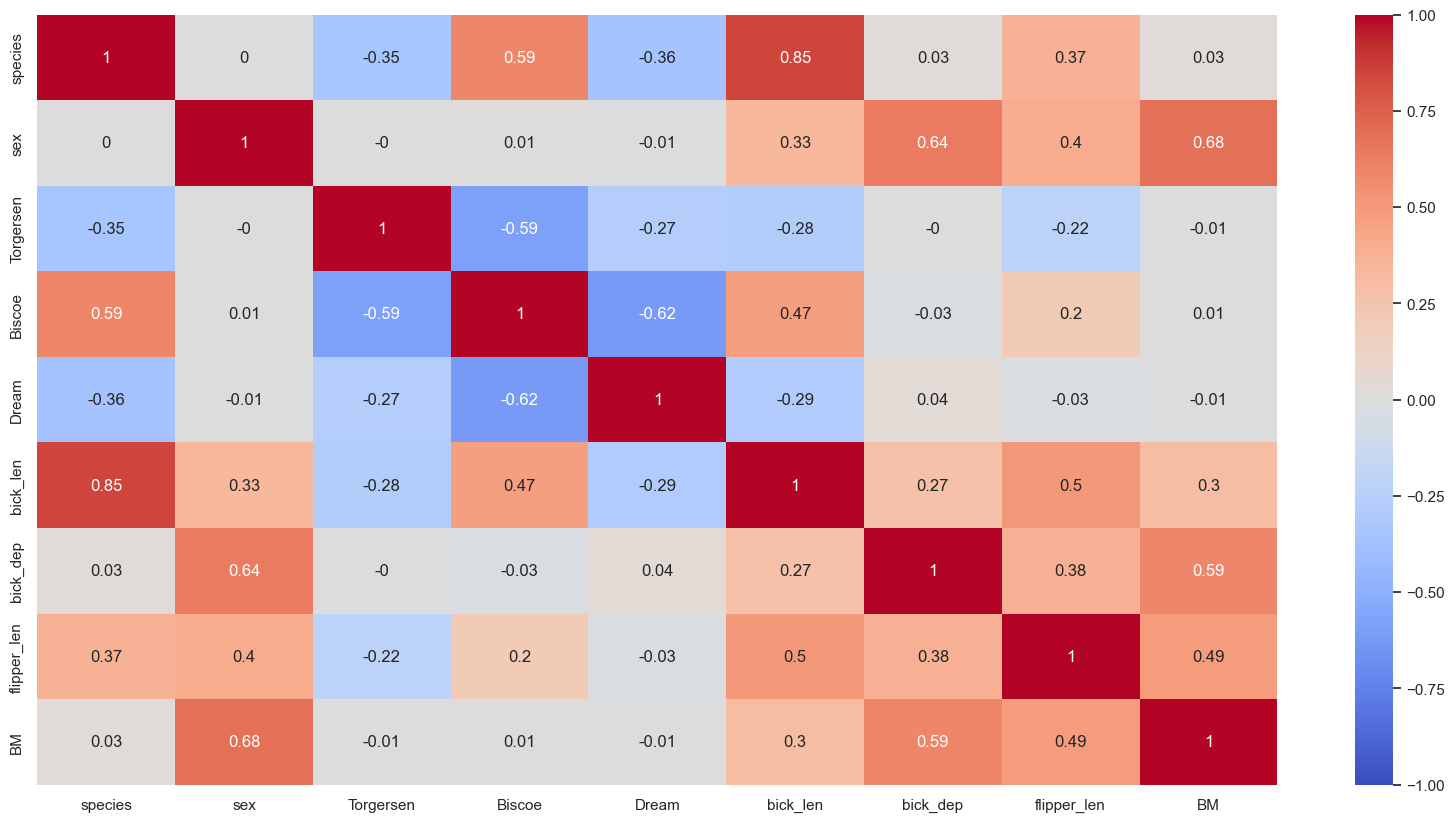

In [103]:
#Heatmap(train)
corr = final.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

<p>Final Step is to 1) divide into Train/Test and 2) Save our target labels</p>

In [177]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = final.drop('species', axis=1)
y = final['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=50)

<br><span style="color:#702963;font-size:25px">**2. Develop and train model**</span><br>

        Logistic Regression provides coefficients that represent the influence of each feature.

In [179]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model and train it
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

LogisticRegression()

        Decision Trees do not make strong assumptions about the data distribution or feature relationships.

In [180]:
from sklearn.tree import DecisionTreeClassifier

# Create a Linear Regression model and train it
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

        Use ALL the tools you have.

![Waterfall](IMG/Google.png)

<br><span style="color:#702963;font-size:25px">**2. Evaluate model**</span><br>

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9067357512953368


<Axes: >

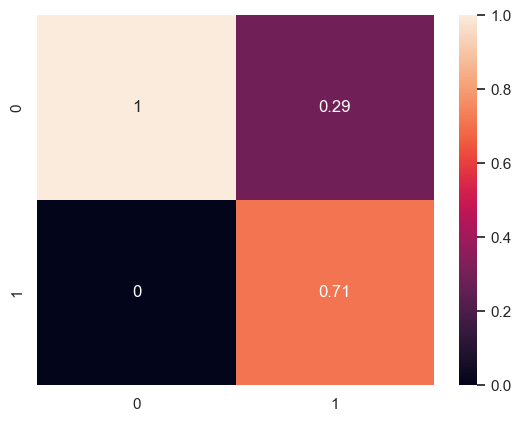

In [183]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm/sum(cm), annot=True)

In [184]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9533678756476683


<Axes: >

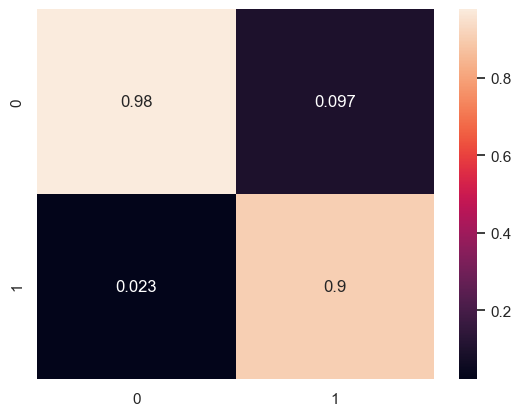

In [185]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm/sum(cm), annot=True)

<br><span style="color:orange;font-size:25px">**OPTIONAL. Have Fun with the results**</span><br>

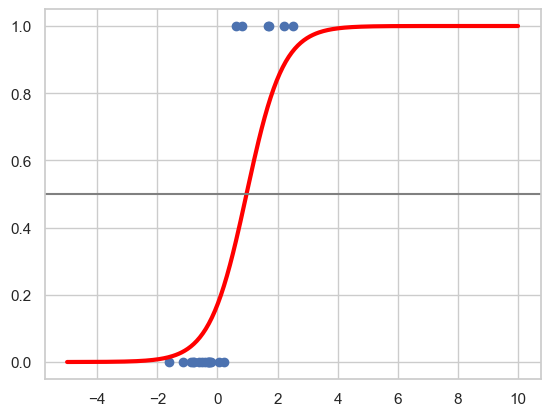

In [200]:
from scipy.special import expit

X_test = np.linspace(-5, 10, 300)

plt.scatter(X_train['bick_len'], y_train)
loss = expit(X_test * reg_model.coef_[0][4] + reg_model.intercept_)
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.axhline(0.5, color=".5")

[Text(0.5, 0.75, 'x[4] <= 0.419\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

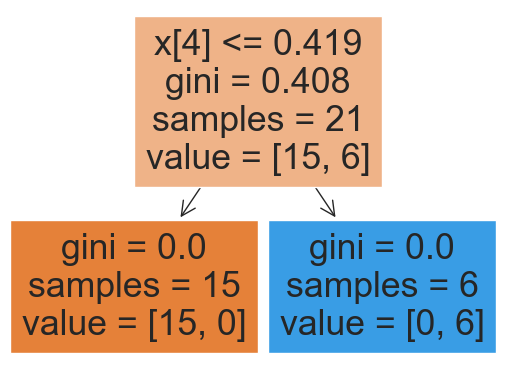

In [186]:
from sklearn.tree import plot_tree

plot_tree(dt, filled=True)

<br><span style="color:Red;font-size:30px">**- Regression**</span><br>

<p>&emsp; Learn a model that can estimate a relationship between input variables and a continuous target variable</p>

<p>&emsp;&emsp;&emsp;(p.e.) Determine the Fecundity of Multiple Flies.</p>

<span style="color:#03989E;font-size:25px">**0. Retrieve Data**</span><br>

        After Penguins, I decided to bring some Crabs!!

<p>&emsp; Target: Estimate the <b>-Age-</b> of crabs, with: </p>
<ul>
    <li> Physical Attribute &ensp; Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight </li>
</ul>

In [203]:
import pandas as pd

In [204]:
# Load Dataset
crab = pd.read_csv('./CRABY/crabs.csv', index_col='id')
crab

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,
0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.05
1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.10
2,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,9.84
3,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,11.31
4,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,11.60
...,...,...,...,...,...,...,...,...
44235,1.2500,1.0000,0.3000,17.463292,6.775531,3.898056,5.244657,9.41
44236,1.5750,1.2500,0.3875,31.708916,13.295915,7.328346,9.497082,10.27
44237,1.6250,1.4125,0.4875,49.874538,23.005619,10.248344,11.481547,10.48


<span style="color:#1D5C5E;font-size:25px">**1. Clean and Explore**</span><br>

In [205]:
crab.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,44240.000000,44240.000000,44240.000000,44240.000000,44240.000000,44240.000000,44240.000000,44240.000000
mean,1.454185,1.138036,0.388476,28.738644,12.482067,6.257498,8.173388,10.661584
std,0.156853,0.129064,0.055867,8.915857,4.211994,2.034467,2.452742,1.569578
min,0.987500,0.775000,0.225000,3.600386,2.636503,1.275727,2.126212,6.290000
25%,1.350000,1.062500,0.350000,22.566202,9.355335,4.762716,6.520385,9.520000
50%,1.475000,1.150000,0.387500,28.760568,12.473780,6.222715,8.150481,10.430000
75%,1.562500,1.225000,0.425000,34.699788,15.351254,7.640190,9.780577,11.550000
max,1.925000,1.512500,0.562500,55.273663,25.018434,12.388732,15.592225,15.720000


In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

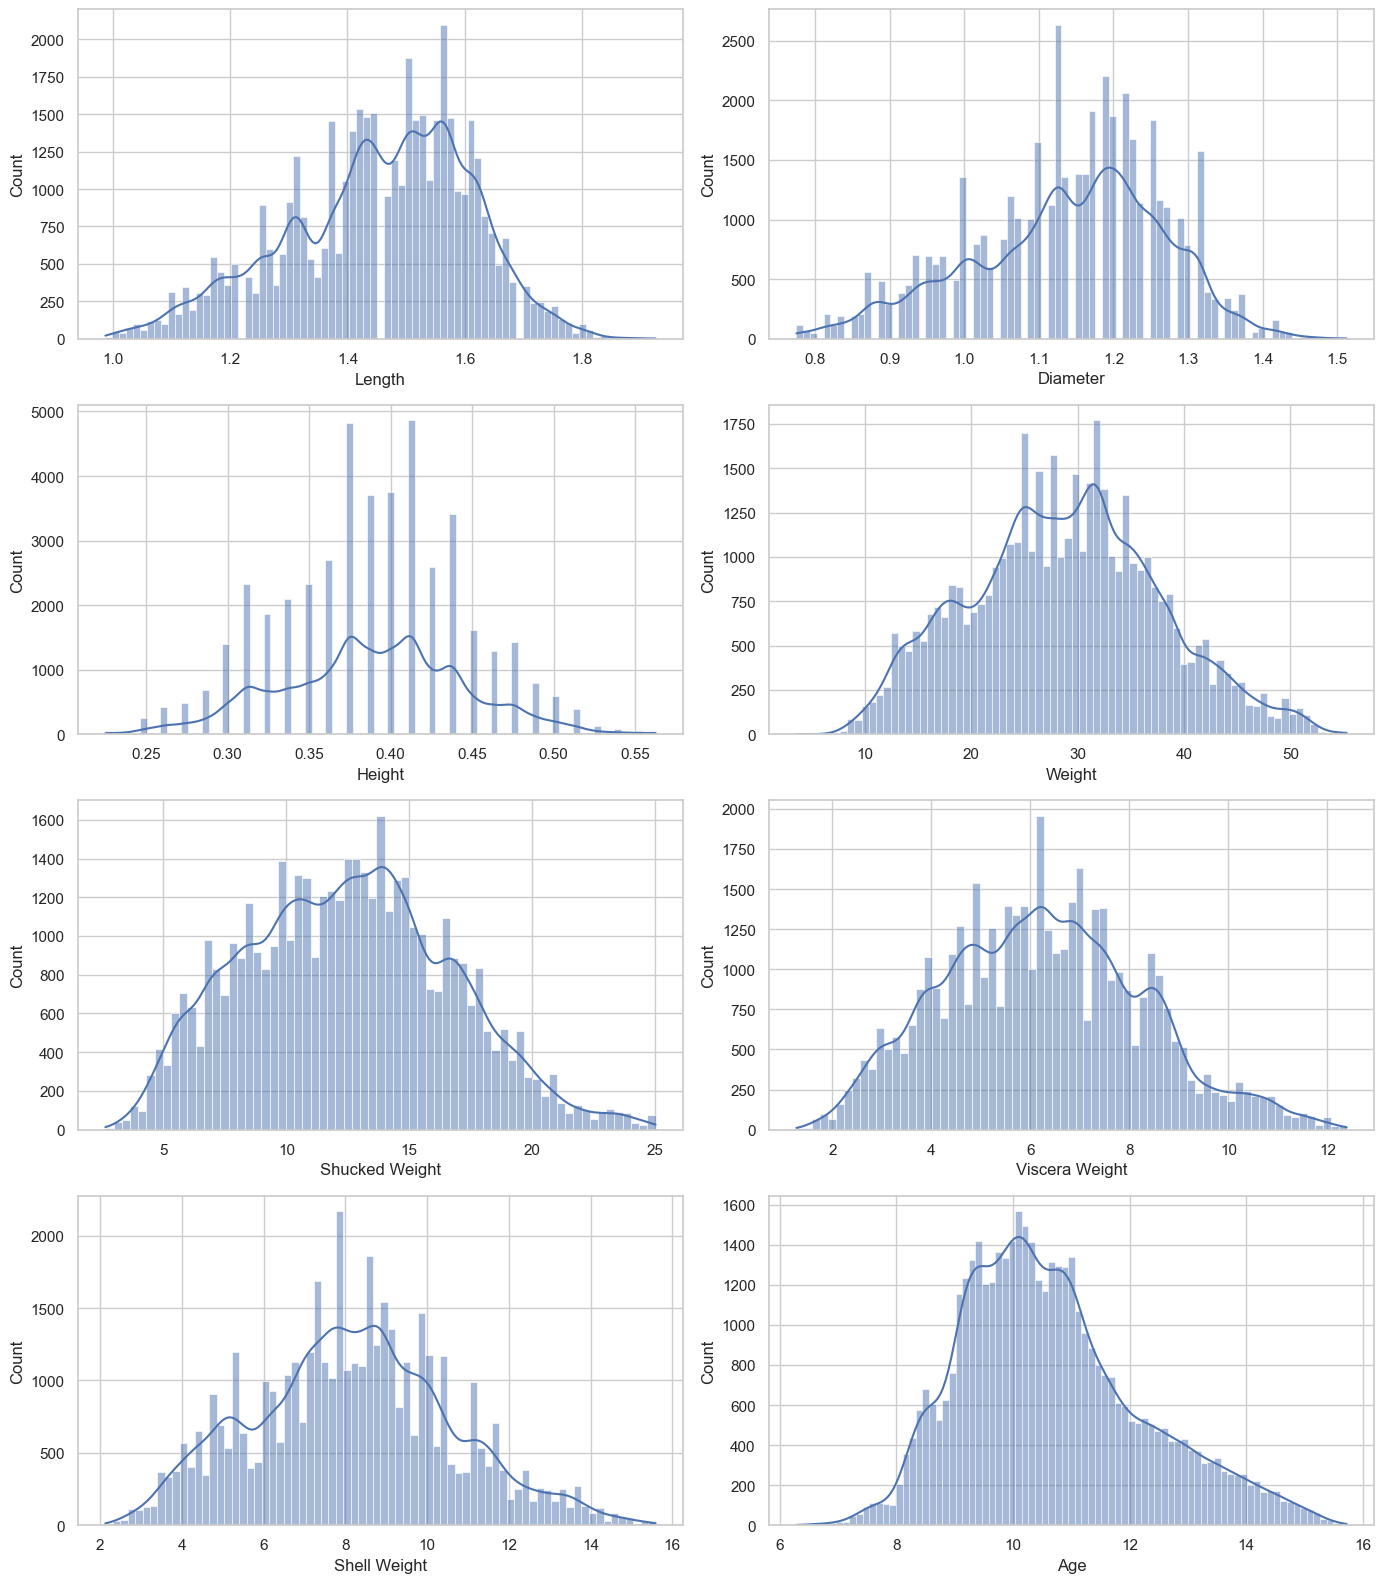

In [207]:
df = crab
title = 'Train'

cols   = df.columns
n_cols = 2
n_rows = (len(cols) - 1) // n_cols + 1

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

for i, var_name in enumerate(cols):
    row = i // n_cols
    col = i % n_cols

    ax = axes[row, col]
    sns.histplot(data=df, x=var_name, kde=True, ax=ax)

plt.tight_layout()
plt.show()

<br><span style="color:#1D5C5E;font-size:25px">**1. Prepare/Transform**</span><br>

In [208]:
crab        = crab.reset_index(drop=True)
int_dataset = crab.select_dtypes(include='number')
str_dataset = crab.select_dtypes(include='object')

<Axes: >

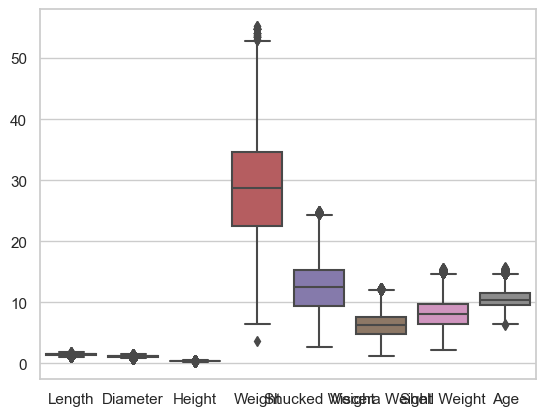

In [209]:
sns.boxplot(crab)

In [210]:
# Don't do it for the TV
y = crab['Age']

In [211]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(int_dataset)

# Transform your data using the scaler
X_scaled = scaler.transform(int_dataset)
crab = pd.DataFrame(X_scaled, columns=int_dataset.columns)

<Axes: >

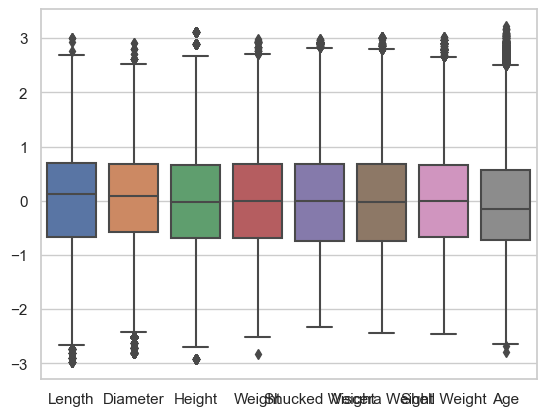

In [212]:
sns.boxplot(crab)

In [213]:
crab['Age'] = y

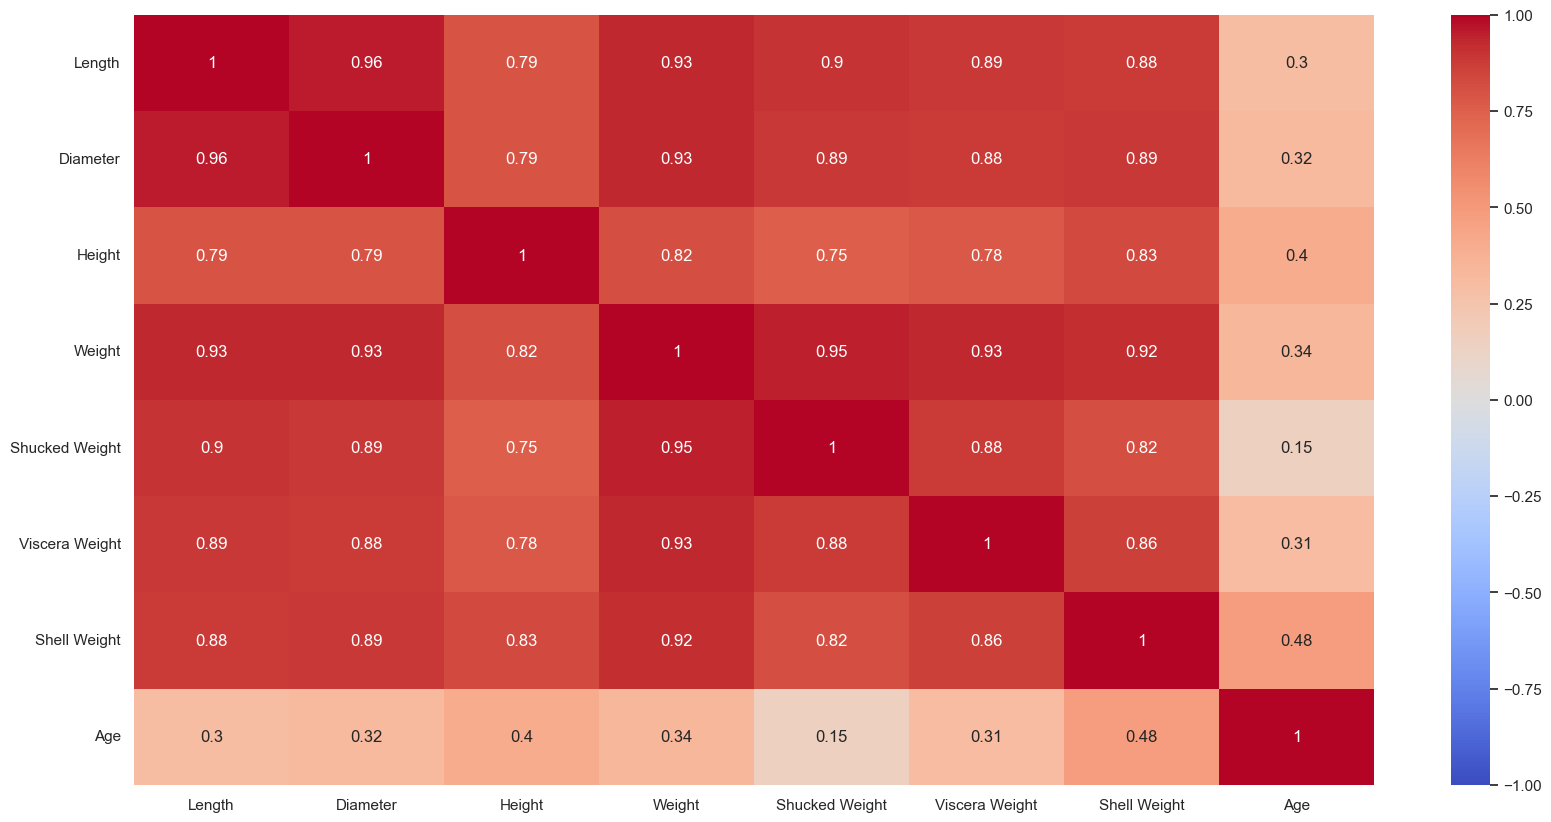

In [214]:
#Heatmap(train)
corr = crab.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Shell Weight', ylabel='Age'>

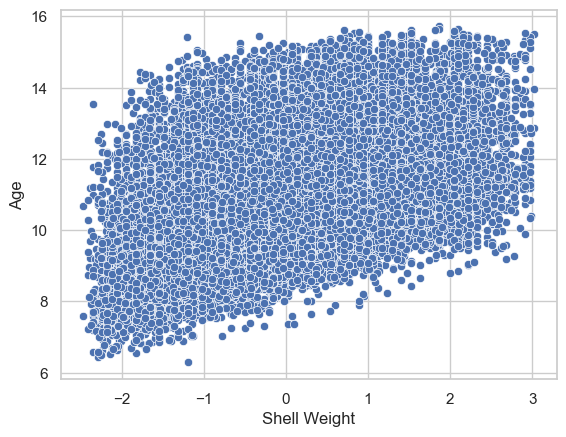

In [215]:
sns.scatterplot(data=crab, x='Shell Weight', y='Age')

In [252]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = crab.drop('Age', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<br><span style="color:#702963;font-size:25px">**2. Develop and train model**</span><br>

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create a Linear Regression model and train it
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [254]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train, y_train)

RandomForestRegressor()

<br><span style="color:#702963;font-size:25px">**2. Evaluate model**</span><br>

In [255]:
# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3411072913224382


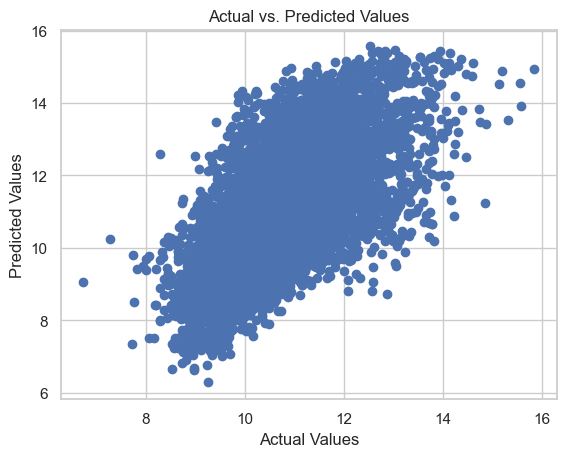

In [256]:
# Plot the model predictions
plt.scatter(y_pred, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [250]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0497012528351712


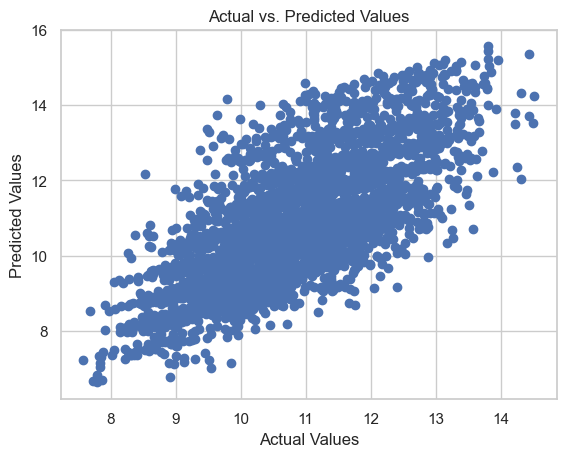

In [251]:
# Plot the model predictions
plt.scatter(y_pred, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

<span style="color:lightblue;font-size:20px">**This has an error ~[0.3]-Times smaller compared to the Linear Regression...**</span><br>